In [56]:
#새만금과 낙동강 하구 영역 추출
import h5py as h5
import netCDF4 as nc
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import time
from scipy import io

import cv2
import csv
import glob
import math
from tqdm import tqdm
import matplotlib.patches as patches

In [14]:
file = '/media/ubuntu/My Book/UST21/Daily/2018/01/UST21_L3_Merged-Chla-1D_20180101.nc'
f = nc.Dataset(path,'r')
lon, lat = f['lon'][:].data, f['lat'][:].data

In [15]:
lon.shape, lat.shape

((8000, 10500), (8000, 10500))

In [16]:
lon

array([[111.604034, 111.60793 , 111.61183 , ..., 150.84639 , 150.85059 ,
        150.85478 ],
       [111.60569 , 111.60959 , 111.61349 , ..., 150.84398 , 150.84818 ,
        150.85239 ],
       [111.60734 , 111.611244, 111.61514 , ..., 150.84158 , 150.84578 ,
        150.84998 ],
       ...,
       [116.91406 , 116.916626, 116.91919 , ..., 143.37364 , 143.37628 ,
        143.3789  ],
       [116.91432 , 116.916885, 116.91945 , ..., 143.37329 , 143.37592 ,
        143.37856 ],
       [116.91457 , 116.91714 , 116.9197  , ..., 143.37294 , 143.37556 ,
        143.3782  ]], dtype=float32)

In [35]:
lat_min, lat_max = 35.00, 35.20
lon_min, lon_max = 128.80, 129.10


In [36]:
mask1 = ((lat >= lat_min) & (lat <= lat_max) & 
        (lon >= lon_min) & (lon <= lon_max)).astype(int) #낙동강

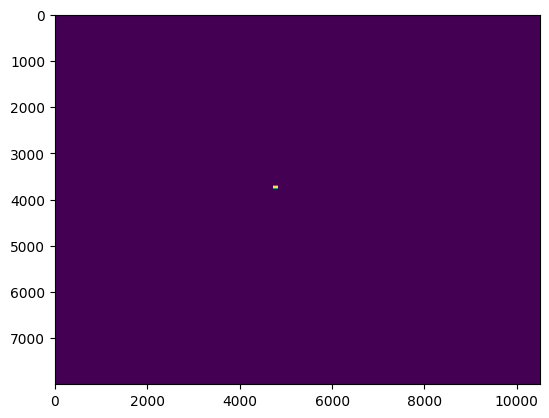

In [37]:
plt.imshow(mask1)

In [38]:

lat_min, lat_max = 35.70, 36.00
lon_min, lon_max = 126.20, 126.50

In [39]:
mask2 = ((lat >= lat_min) & (lat <= lat_max) & 
        (lon >= lon_min) & (lon <= lon_max)).astype(int) #낙동강

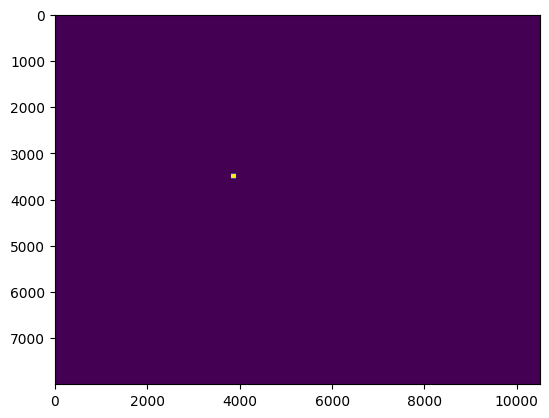

In [40]:
plt.imshow(mask2)

In [50]:
nakdong_coords = np.argwhere(mask1)
nakdong_top_left = nakdong_coords.min(axis=0)
nakdong_bottom_right = nakdong_coords.max(axis=0)
nakdong_width = nakdong_bottom_right[1] - nakdong_top_left[1]
nakdong_height = nakdong_bottom_right[0] - nakdong_top_left[0]

saemangeum_coords = np.argwhere(mask2)
saemangeum_top_left = saemangeum_coords.min(axis=0)
saemangeum_bottom_right = saemangeum_coords.max(axis=0)
saemangeum_width = saemangeum_bottom_right[1] - saemangeum_top_left[1]
saemangeum_height = saemangeum_bottom_right[0] - saemangeum_top_left[0]

nakdong_top_left, nakdong_width, nakdong_height, saemangeum_top_left, saemangeum_width, saemangeum_height

(array([3710, 4711]), 106, 63, array([3454, 3801]), 106, 95)

In [57]:
mat_file = io.loadmat('/home/ubuntu/문서/AY_ust/preprocessing/Land_mask/Land_mask.mat')
mask = mat_file['Land']


In [58]:
mask.shape

(8000, 10500)

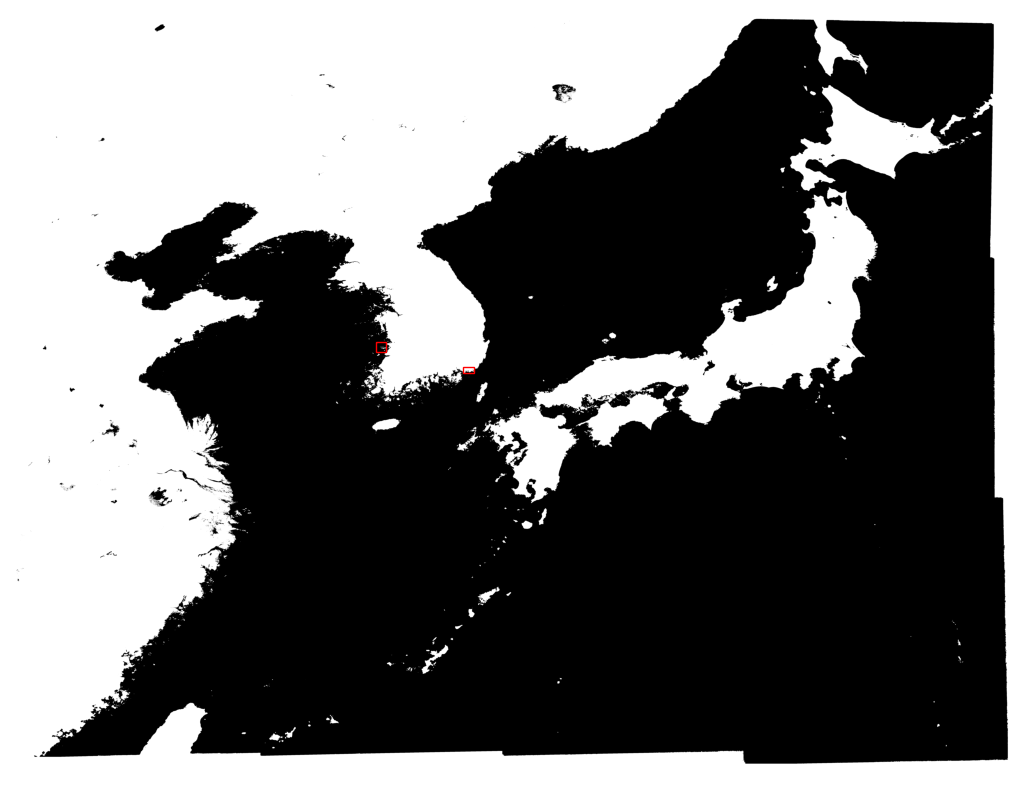

In [60]:
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.imshow(mask, cmap='gray')

nakdong_rect = patches.Rectangle((nakdong_top_left[1], nakdong_top_left[0]), nakdong_width, nakdong_height, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(nakdong_rect)

# 새만금에 사각형 추가
saemangeum_rect = patches.Rectangle((saemangeum_top_left[1], saemangeum_top_left[0]), saemangeum_width, saemangeum_height, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(saemangeum_rect)

ax.axis('off')  # 축 정보 숨기기
plt.show()

In [61]:
# 낙동강 하구와 새만금의 변환된 위도 경도
nakdong_lat, nakdong_lon = 35.07, 128.93
saemangeum_lat, saemangeum_lon = 35.84, 126.54

# 낙동강 하구에 대한 거리 계산
distances_to_nakdong = np.sqrt((lat - nakdong_lat)**2 + (lon - nakdong_lon)**2)
closest_idx_to_nakdong = np.unravel_index(np.argmin(distances_to_nakdong), distances_to_nakdong.shape)

# 새만금에 대한 거리 계산
distances_to_saemangeum = np.sqrt((lat - saemangeum_lat)**2 + (lon - saemangeum_lon)**2)
closest_idx_to_saemangeum = np.unravel_index(np.argmin(distances_to_saemangeum), distances_to_saemangeum.shape)

closest_idx_to_nakdong, closest_idx_to_saemangeum


((3751, 4757), (3505, 3920))

In [62]:
closest_idx_to_nakdong

(3751, 4757)

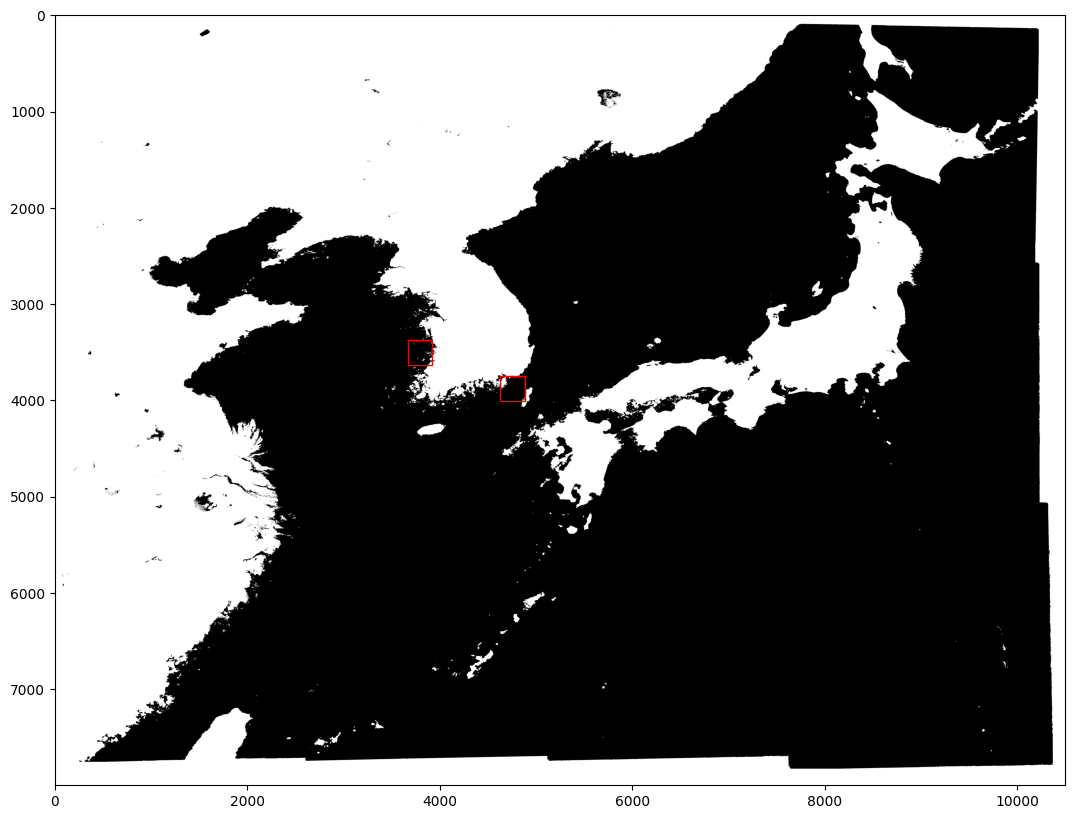

In [82]:
# 위에서 계산한 가장 가까운 픽셀의 인덱스
x_nakdong, y_nakdong = closest_idx_to_nakdong  # 낙동강 하구 위치
x_saemangeum, y_saemangeum = closest_idx_to_saemangeum  # 새만금 위치
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.imshow(mask, cmap='gray')  # 데이터에 맞는 색상 맵 사용

# 낙동강 하구 위치에 빨간색 박스 추가
rect_nakdong = plt.Rectangle((y_nakdong-128, x_nakdong), 256, 256, edgecolor='red', facecolor='none')
ax.add_patch(rect_nakdong)

# 새만금 위치에 빨간색 박스 추가
rect_saemangeum = plt.Rectangle((y_saemangeum-256, x_saemangeum-128), 256, 256, edgecolor='red', facecolor='none')
ax.add_patch(rect_saemangeum)

plt.show()


In [77]:
save_path = '/media/ubuntu/My Book/Preprocessed/UST21/Chl-a/Ocean'
if not os.path.isdir(save_path):
    os.makedirs(save_path)

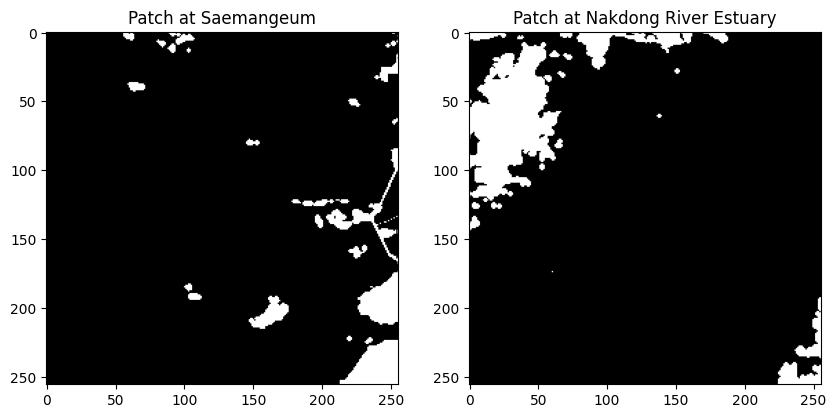

In [83]:
# 데이터에서 낙동강 하구 위치의 256x256 패치 추출
patch_nakdong = mask[x_nakdong:x_nakdong+256, y_nakdong-128:y_nakdong+128]

# 데이터에서 새만금 위치의 256x256 패치 추출
patch_saemangeum = mask[x_saemangeum-128:x_saemangeum+128, y_saemangeum-256:y_saemangeum]

# 추출된 데이터를 보기 위한 시각화
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[1].imshow(patch_nakdong, cmap='gray')
axs[1].set_title('Patch at Nakdong River Estuary')
axs[0].imshow(patch_saemangeum, cmap='gray')
axs[0].set_title('Patch at Saemangeum')

plt.show()



In [84]:
x_nakdong:x_nakdong+256, y_nakdong-128:y_nakdong+128

(3377, 3633, 3664, 3920)

In [85]:
x_nakdong,x_nakdong+256, y_nakdong-128,y_nakdong+128

(3751, 4007, 4629, 4885)

In [86]:
x_nakdong, y_nakdong-128

(3751, 4629)

In [88]:
x_saemangeum-128, y_saemangeum-256

(3377, 3664)